## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Dataset 

In [2]:
data = pd.read_csv("loan_status.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Checking null values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

-     Since there are not much null values, we will directly remove the rows with null values.

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Visualization

<Axes: xlabel='Education', ylabel='count'>

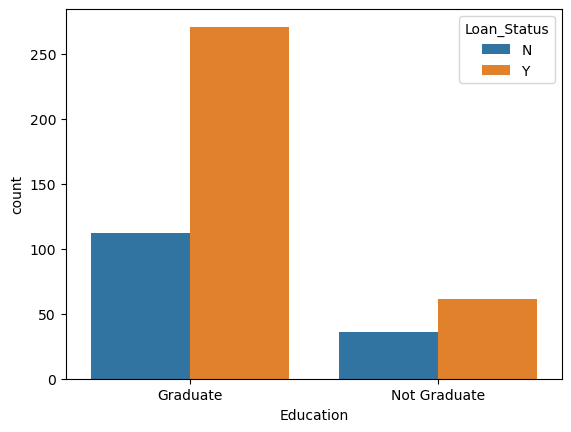

In [7]:
sns.countplot(x='Education', hue='Loan_Status', data=data)

In [8]:
data['Credit_History'].value_counts()

Credit_History
1.0    410
0.0     70
Name: count, dtype: int64

<Axes: xlabel='Credit_History', ylabel='count'>

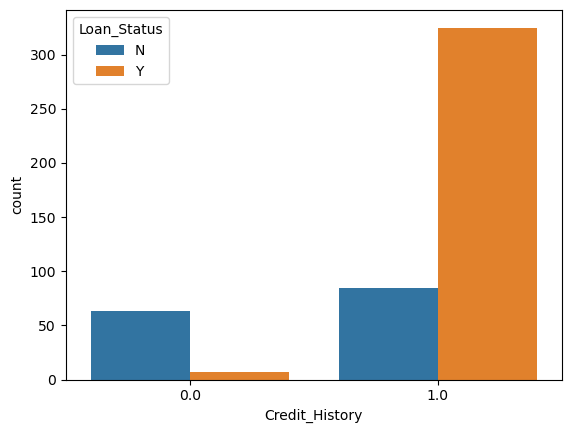

In [9]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=data)

We can clearly see that, when the credit history of applicant is good then the possibility of loan getting approved is much higher as compared to when credit history is bad.

## Label Encoding

In [10]:
data.replace({"Loan_Status":{"Y":1,"N":0}},inplace=True)

In [11]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
data["Dependents"].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [13]:
data.replace(to_replace="3+", value=3, inplace=True)

In [14]:
data["Dependents"].value_counts()

Dependents
0    274
2     85
1     80
3     41
Name: count, dtype: int64

## One Hot Encoding

In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [16]:
data.replace({'Gender':{'Male':1 , 'Female':0}, 'Married':{'Yes':1, 'No':0}, 'Education':{'Graduate':1 , 'Not Graduate':0}, 
              'Self_Employed':{'No':0 , 'Yes':1}, 'Property_Area':{'Rural':0 , 'Semiurban':1, 'Urban':2}}, inplace = True)

In [17]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [18]:
X = data.drop(columns=['Loan_ID' , 'Loan_Status'],axis=1)
y=data['Loan_Status']

In [19]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, shuffle= y, random_state=42)

## Training The Model

In [22]:
from sklearn import svm

In [23]:
classifier = svm.SVC(kernel='linear')

In [24]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

-     Predicting the training data

In [25]:
train_data_pred = classifier.predict(X_train)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
train_accuracy = accuracy_score(train_data_pred,y_train)

In [28]:
print('Accuracy of train data: ', train_accuracy)

Accuracy of train data:  0.796875


-     Predicting the test data

In [29]:
test_data_pred = classifier.predict(X_test)

In [30]:
test_accuracy = accuracy_score(test_data_pred,y_test)
print('Accuracy of test data: ', test_accuracy)

Accuracy of test data:  0.8125


Note: selection of right kernel.

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
kernels = ['linear','poly','rbf']
for k in kernels:
    model = svm.SVC(kernel = k)
    scores = cross_val_score(model, X, y, cv=5)
    print(f'{k} kernel accuracy: {np.mean(scores):.3f}')

linear kernel accuracy: 0.771
poly kernel accuracy: 0.690
rbf kernel accuracy: 0.692


## Hyperparameter tuning

In [31]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0.1,1,10,100,1000],
             'gamma':[1,0.1,0.01,0.001,0.0001],
             'kernel':['rbf','linear','poly']}

grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.701 total time=  42.3s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.831 total time= 1.3min
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.805 total time=  40.5s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.766 total time=  31.3s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.829 total time= 1.1min


In [ ]:
print(grid.best_params_)

In [ ]:
grid_prediction = grid.predict(X_test)

In [ ]:
grid_accuracy = accuracy_score(grid_prediction, y_test)
print('Accuracy of test data by CV: ',grid_accuracy)

## THANK YOU!